<a href="https://colab.research.google.com/github/jmershov/SureStartFutureMakers/blob/main/Day_21_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers


In [2]:
encoding_dim = 32
input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [3]:
encoder = keras.Model(input_img, encoded)

In [4]:
encoded_input = keras.Input(shape=(encoding_dim),)
decoded_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoded_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 14s 5ms/step - loss: 0.3835 - val_loss: 0.1872
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1780 - val_loss: 0.1530
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1489 - val_loss: 0.1339
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1318 - val_loss: 0.1219
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1205 - val_loss: 0.1130
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1124 - val_loss: 0.1065
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1065 - val_loss: 0.1021
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1025 - val_loss: 0.0989
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0996 - val_loss: 0.0967
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0977 - val_loss: 0.095

In [9]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

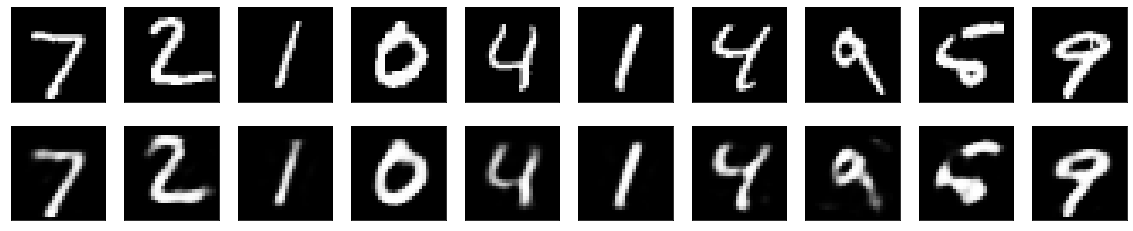

In [10]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()